In [1]:
from data.load_data import load_basic_dataset
import numpy as np 
import tensorflow as tf 
name = 'Coffee'
window = 286
x_train, x_test, y_train, y_test=load_basic_dataset(name,window, scaling='None')
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

model = tf.keras.models.load_model('/media/jacqueline/Data/InterpretabiltyTimeSeries/ClassificationModels/models/Coffee/cnn/best_model.hdf5')

masker : function or numpy.array or pandas.DataFrame
            A callable python object used to "mask" out hidden features of the form `masker(binary_mask, x)`.
            It takes a single input sample and a binary mask and returns a matrix of masked samples. These
            masked samples are evaluated using the model function and the outputs are then averaged.
            As a shortcut for the standard masking using by SHAP you can pass a background data matrix
            instead of a function and that matrix will be used for masking. To use a clustering
            game structure you can pass a shap.maksers.Tabular(data, clustering=\"correlation\") object.
from https://github.com/slundberg/shap/blob/46b3800b31df04745416da27c71b216f91d61775/shap/explainers/_permutation.py#L16

http://proceedings.mlr.press/v139/crabbe21a/crabbe21a.pdf

In [2]:
from InterpretabilityModels.Shap.Masker import timeseries,  TimeSeriesMasker

In [3]:
ma2= TimeSeriesMasker('local_noise',x_test,x_test[0].shape)

In [4]:
import shap 
X= x_test[0]
print(X.shape)
#masker = TimeSeries("noise",x_test ,shape=X.shape)
explainer = shap.Explainer(model, masker=ma2)

shap_values= explainer([X],max_evals=800)
#print(shap_values)
# visualize the first prediction's explanation
#shap.plots.waterfall(explainer.base_values[0], shap_values[0], X)#shap_values[0])

(286, 1)


1
(286, 1)
286


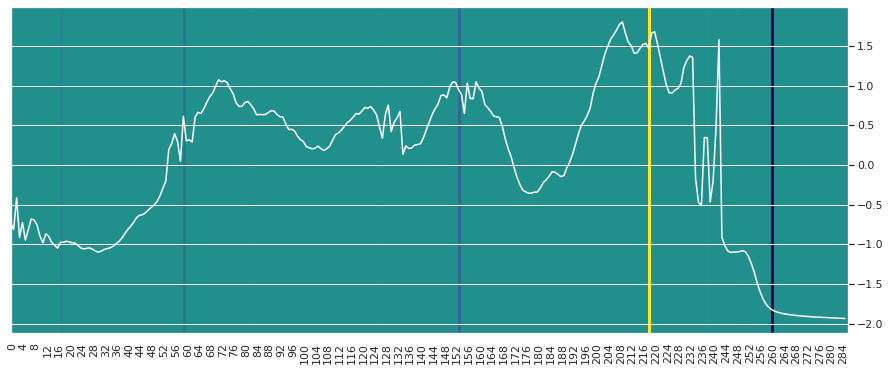

In [5]:
#print(shap_values[0].shape)
#print(shap_values[:].shape)
#shap.summary_plot(shap_values[...,0], X)
#print(shap_values[...,0][0])
timeseries(shap_values[...,0],np.array([X]))